# MPNeuron 

In [0]:
import sklearn.datasets          # for datasets 
import numpy as np
import pandas as pd

### loading dataset from sklearn

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()          #loading a paticular dataset from sklearn

In [0]:
x=breast_cancer.data         #it is the input (x)
y=breast_cancer.target       #it is the true output (y)

In [77]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [78]:
print(x.shape, y.shape)   

(569, 30) (569,)


In [0]:
data=pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)          # converting the dataframe into pandas formate

### creating column in pandas

In [0]:
data['class']=breast_cancer.target                              # creates the column for true_output (y)

In [81]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [82]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [83]:
print(data['class'].value_counts())     

1    357
0    212
Name: class, dtype: int64


In [84]:
print(breast_cancer.target_names)       #( malignant means there is cancer )  (benign means no)

['malignant' 'benign']


In [85]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## spliting data for test and train

In [0]:
from sklearn.model_selection import train_test_split

### droping a column in pandas

In [0]:
x=data.drop('class',axis=1)       # droping the true output (y) from the data and taking the input (x)
y=data['class']                   # taking the true output(y)

In [88]:
type(x)

pandas.core.frame.DataFrame

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y)   #it splits data for training and testing

In [90]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (426, 30) (143, 30)


## modifing quantity of test and train data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)         # we need just 10% of data for testing and remainding for training  

In [92]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (512, 30) (57, 30)


In [93]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (512,) (57,)


## Statistically equalising train and test data

In [94]:
print(y.mean(), y_train.mean(), y_test.mean())              # can see the train and test data are statistically different (there are more malegnant in train data than in test data) but the train and test data should be statically equal in machine learning

0.6274165202108963 0.623046875 0.6666666666666666


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y)  # so we statify the data with respect to y (true output)

In [96]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


## recorrecting randomness in spliting
the output after running the train_test_split will not be equal after rerunning the same code (because it randomly split the data) 

In [97]:
print(x_train.mean(), x_test.mean(), x.mean())

mean radius                 14.199781
mean texture                19.266367
mean perimeter              92.483320
mean area                  662.182812
mean smoothness              0.096281
mean compactness             0.105297
mean concavity               0.089784
mean concave points          0.049523
mean symmetry                0.181231
mean fractal dimension       0.062760
radius error                 0.411027
texture error                1.220205
perimeter error              2.913632
area error                  41.256537
smoothness error             0.007056
compactness error            0.025857
concavity error              0.031938
concave points error         0.011914
symmetry error               0.020569
fractal dimension error      0.003810
worst radius                16.349951
worst texture               25.588984
worst perimeter            107.862637
worst area                 890.105859
worst smoothness             0.131964
worst compactness            0.255548
worst concav

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y)  #the output values are different after rerunning

In [99]:
print(x_train.mean(), x_test.mean(), x.mean())

mean radius                 14.125225
mean texture                19.307168
mean perimeter              91.967637
mean area                  654.316211
mean smoothness              0.096680
mean compactness             0.104934
mean concavity               0.089605
mean concave points          0.049148
mean symmetry                0.181574
mean fractal dimension       0.062871
radius error                 0.408510
texture error                1.213273
perimeter error              2.878761
area error                  40.801393
smoothness error             0.007052
compactness error            0.025541
concavity error              0.032018
concave points error         0.011773
symmetry error               0.020572
fractal dimension error      0.003811
worst radius                16.301254
worst texture               25.697676
worst perimeter            107.439531
worst area                 884.067188
worst smoothness             0.132795
worst compactness            0.256905
worst concav

in machine learning there should not be variation after rerunning the code because it affects the evaluation at each time running the model 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y, random_state=3)  #to avoid variation use random_state=some constant{it can be any integer constant}

In [101]:
print(x_train.mean(), x_test.mean(), x.mean())

mean radius                 14.022119
mean texture                19.286211
mean perimeter              91.266348
mean area                  645.180078
mean smoothness              0.096583
mean compactness             0.104042
mean concavity               0.088249
mean concave points          0.048288
mean symmetry                0.181552
mean fractal dimension       0.062889
radius error                 0.401108
texture error                1.223169
perimeter error              2.837574
area error                  39.672730
smoothness error             0.007096
compactness error            0.025565
concavity error              0.032191
concave points error         0.011840
symmetry error               0.020756
fractal dimension error      0.003832
worst radius                16.121150
worst texture               25.663828
worst perimeter            106.244395
worst area                 863.284766
worst smoothness             0.132500
worst compactness            0.253774
worst concav

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y, random_state=3)  #the output remains same (even after closing the notebook and rerunning the values remains same)

In [103]:
print(x_train.mean(), x_test.mean(), x.mean())

mean radius                 14.022119
mean texture                19.286211
mean perimeter              91.266348
mean area                  645.180078
mean smoothness              0.096583
mean compactness             0.104042
mean concavity               0.088249
mean concave points          0.048288
mean symmetry                0.181552
mean fractal dimension       0.062889
radius error                 0.401108
texture error                1.223169
perimeter error              2.837574
area error                  39.672730
smoothness error             0.007096
compactness error            0.025565
concavity error              0.032191
concave points error         0.011840
symmetry error               0.020756
fractal dimension error      0.003832
worst radius                16.121150
worst texture               25.663828
worst perimeter            106.244395
worst area                 863.284766
worst smoothness             0.132500
worst compactness            0.253774
worst concav

# Binarisation of input

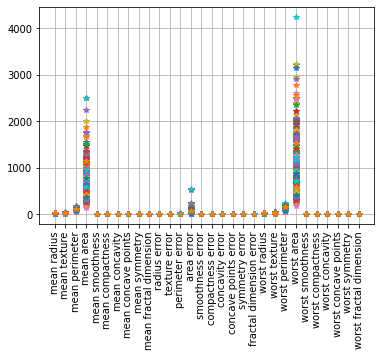

In [104]:
import matplotlib.pyplot as plt
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()


some values are not in binary formate MP Neuron accepts only binary input so we need to convert them

In [0]:
x_binarised_3_train=x_train['mean area'].map(lambda x: 0 if x< 1000 else 1)   #binarising 'mean area' column by seperating >1000 as 1 and <1000 as 0

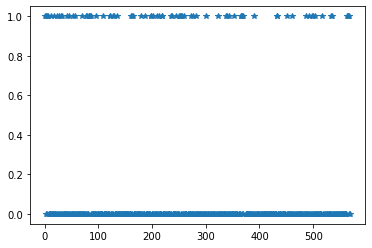

In [106]:
plt.plot(x_binarised_3_train,'*')

## binarizing all column at a single time

In [0]:
x_binarised_train=x_train.apply(pd.cut,bins=2, labels=[0,1])  # pd.cut identy appropriate threshold and split into the bins given (2 given)

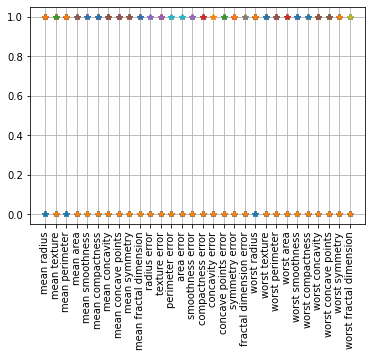

In [108]:
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2, labels=[0,1])

In [110]:
type(x_binarised_test)

pandas.core.frame.DataFrame

## converting pandas dataframe into numpy array

In [0]:
x_binarised_test=x_binarised_test.values
x_binarised_train=x_binarised_train.values

In [112]:
type(x_binarised_test)

numpy.ndarray

In [0]:
from random import randint

In [114]:
b=3
i=randint(0, x_binarised_train.shape[0])
print('for row ',i)
if(np.sum(x_binarised_train[100: ])>=b):
  print("MP neuron inference is malignant")
else:
  print("MP neuron inference is benign")

if(y_train[i]==1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')

for row  252
MP neuron inference is malignant
Ground truth is benign


In [115]:
b=3                                               #threshold =3
y_pred_train=[]
accurate_rows=0
for x,y in zip(x_binarised_train,y_train):            
  y_pred=np.sum(x)>=b                                          #sums the row elements 
  y_pred_train.append(y_pred)                                  
  accurate_rows+=(y==y_pred)                                #if the condition is true it returns bolean which is automatically type casted into int(1)
print('accurate_rows: ',accurate_rows,' accuracy: ',accurate_rows/x_binarised_train.shape[0])

accurate_rows:  77  accuracy:  0.150390625


In [116]:
for b in range(x_binarised_train.shape[1]+1):       # as the sum does not exeds the number of parameters(columns) 
  y_pred_train=[]
  accurate_rows=0
  for x,y in zip(x_binarised_train,y_train):
    y_pred=np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print('b: ',b,' accurate_rows: ',accurate_rows,' accuracy: ',accurate_rows/x_binarised_train.shape[0])


b:  0  accurate_rows:  321  accuracy:  0.626953125
b:  1  accurate_rows:  132  accuracy:  0.2578125
b:  2  accurate_rows:  93  accuracy:  0.181640625
b:  3  accurate_rows:  77  accuracy:  0.150390625
b:  4  accurate_rows:  75  accuracy:  0.146484375
b:  5  accurate_rows:  90  accuracy:  0.17578125
b:  6  accurate_rows:  107  accuracy:  0.208984375
b:  7  accurate_rows:  125  accuracy:  0.244140625
b:  8  accurate_rows:  141  accuracy:  0.275390625
b:  9  accurate_rows:  151  accuracy:  0.294921875
b:  10  accurate_rows:  161  accuracy:  0.314453125
b:  11  accurate_rows:  169  accuracy:  0.330078125
b:  12  accurate_rows:  173  accuracy:  0.337890625
b:  13  accurate_rows:  176  accuracy:  0.34375
b:  14  accurate_rows:  180  accuracy:  0.3515625
b:  15  accurate_rows:  184  accuracy:  0.359375
b:  16  accurate_rows:  187  accuracy:  0.365234375
b:  17  accurate_rows:  188  accuracy:  0.3671875
b:  18  accurate_rows:  190  accuracy:  0.37109375
b:  19  accurate_rows:  191  accuracy:  0

in the above cases the accuracy is more when b is 0 and the accuray drops down when we increase the value of b. 
#### why it is happening?
because in the data frame where we found the mean for all parameters by grouping the real output, the value of grouped mean for benign (0) is higher than the value of grouped mean for malignant(1).
#### where i done the mistake?
in the binirisation of the values --> the pd.cut fixes the threshold at certain level. The values below the level are fixed as benign(0) and the values above the level are fixed as malignant(1) by lable[0,1] which is irrespective to the group mean values.

### recorrecting the model

In [0]:
x_binarised_train=x_train.apply(pd.cut,bins=2, labels=[1,0])

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2, labels=[1,0])

In [0]:
x_binarised_test=x_binarised_test.values
x_binarised_train=x_binarised_train.values

In [120]:
for b in range(x_binarised_train.shape[1]+1):       # as the sum does not exeds the number of parameters(columns) 
  y_pred_train=[]
  accurate_rows=0
  for x,y in zip(x_binarised_train,y_train):
    y_pred=np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print('b: ',b,' accurate_rows: ',accurate_rows,' accuracy: ',accurate_rows/x_binarised_train.shape[0])


b:  0  accurate_rows:  321  accuracy:  0.626953125
b:  1  accurate_rows:  321  accuracy:  0.626953125
b:  2  accurate_rows:  321  accuracy:  0.626953125
b:  3  accurate_rows:  321  accuracy:  0.626953125
b:  4  accurate_rows:  321  accuracy:  0.626953125
b:  5  accurate_rows:  321  accuracy:  0.626953125
b:  6  accurate_rows:  321  accuracy:  0.626953125
b:  7  accurate_rows:  321  accuracy:  0.626953125
b:  8  accurate_rows:  321  accuracy:  0.626953125
b:  9  accurate_rows:  321  accuracy:  0.626953125
b:  10  accurate_rows:  321  accuracy:  0.626953125
b:  11  accurate_rows:  321  accuracy:  0.626953125
b:  12  accurate_rows:  321  accuracy:  0.626953125
b:  13  accurate_rows:  322  accuracy:  0.62890625
b:  14  accurate_rows:  324  accuracy:  0.6328125
b:  15  accurate_rows:  325  accuracy:  0.634765625
b:  16  accurate_rows:  328  accuracy:  0.640625
b:  17  accurate_rows:  332  accuracy:  0.6484375
b:  18  accurate_rows:  336  accuracy:  0.65625
b:  19  accurate_rows:  339  accur

#### the above results show more accuracy 
we can find the maximum accuracy at b(threshold) vlue = 27
# so the wright way of binirising plays a crusial role in accuracy

# testing the model

In [0]:
from sklearn.metrics import accuracy_score

In [125]:
b=27
y_pred_test=[]
accurate_rows=0
for x in x_binarised_test:                          # taking the range for test data size
  y_pred=(np.sum(x)>=b)
  y_pred_test.append(y_pred)
accuracy=accuracy_score(y_pred_test,y_test)        #using sklearn for accyracy of predicted y and the true test y
print("b:",b," accuracy:",accuracy)

b: 27  accuracy: 0.8070175438596491


# MP Neuron using class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None
  def model(self,x):                                  # MP NN model
    return(sum(x)>=self.b)                              #returns 1 if the condition is true
  def predict(self,x):                                # MP NN algorithm
    y=[]
    for i in x:
      result=self.model(i)
      y.append(result)
    return np.array(y)
  def fit(self,x,y):                                   # MP NN learining section
    accuracy={}                                          #dictionary to hold b value and accuracy 
    for b in range(x.shape[1]+1):
      self.b=b                                           #taking self.b=b to use in predict(x)
      y_pred=self.predict(x)
      accuracy[b]=accuracy_score(y_pred,y)               #finding the accuracy using sklearn 
    best_b=max(accuracy,key=accuracy.get)                #geting the key corresponding to maximum value
    self.b=best_b                                        #updating b with best value of b             
    print('optimal value of b is', best_b)
    print('Highest acuracy is',accuracy[best_b])

In [127]:
mp_neuron=MPNeuron()            # creating object for class
mp_neuron.fit(x_binarised_train, y_train)  # learining with test data and finding best b value

optimal value of b is 27
Highest acuracy is 0.853515625


In [0]:
#the b value is updated with best b value with train data
y_test_pred=mp_neuron.predict(x_binarised_test)     # testing the model with test data 
accuracy_test=accuracy_score(y_test_pred,y_test)     # finding accuracy here to not to disturb best b value which is found using train data

In [129]:
print(accuracy_test)

0.8070175438596491
